# Exercício 4 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9570359587669373, 1.5323949657974385e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FourthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2          3         4
0 -4.632472 -0.212518  2.338407   0.831017 -6.417481
1 -7.526377 -7.222836  5.739285  11.365812 -3.120320
2  2.906268 -1.592086  1.012788   5.034538  2.623468
3  0.058220 -2.802066  1.920736   5.696890  1.383289
4 -0.556034 -2.844038  2.688410   6.780288 -2.209821


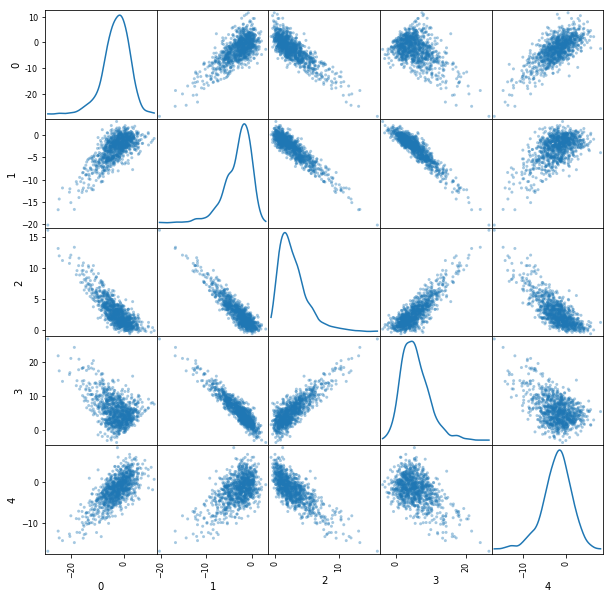

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1946,0.3104,0.9683,6.1208e-14
1,0.2063,1.4078,0.9179,7.1722e-23
2,0.304,1.6141,0.893,8.9357e-26
3,0.2663,0.5746,0.9518,1.372e-17
4,0.1807,0.2197,0.9796,1.2944e-10


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 100)

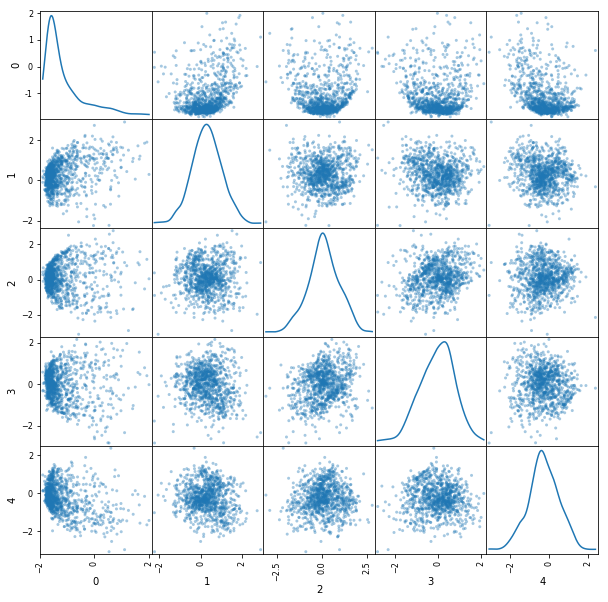

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1366,26.0614,0.7847,2.4664e-34
1,0.2401,0.0459,0.998,0.29844
2,0.0208,0.6536,0.9968,0.039303
3,0.0421,0.6367,0.9943,0.00073006
4,0.0032,0.0481,0.9971,0.070949


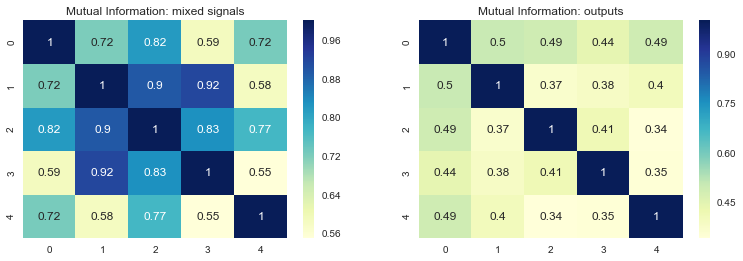

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 100) 

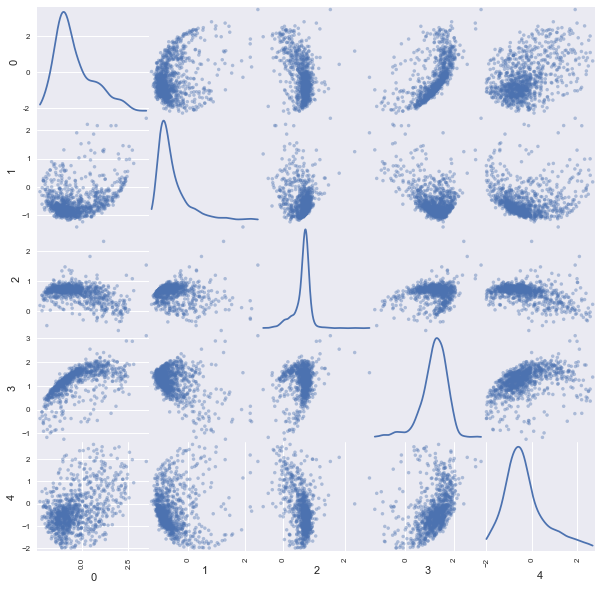

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0203,9.7319,0.9273,1.3426e-21
1,0.3907,2.4983,0.7902,5.4238e-34
2,0.9879,0.5981,0.8424,2.3785e-30
3,0.3452,0.5253,0.9312,5.0324e-21
4,-0.0576,3.3658,0.9385,6.5918e-20


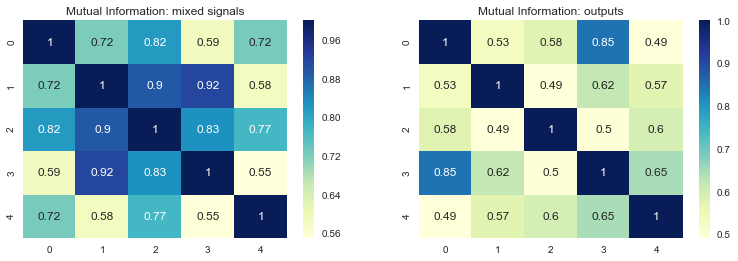

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [15]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 100)

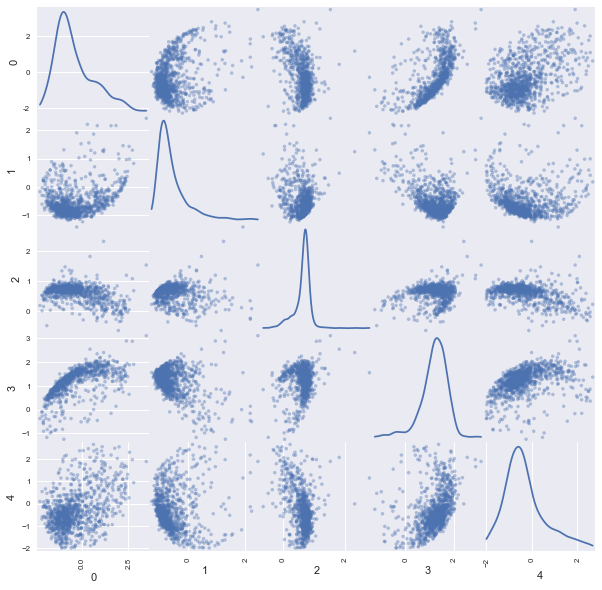

In [16]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,-0.0952,0.4503,0.9273,1.3428e-21
1,0.3857,2.4174,0.7902,5.4241e-34
2,0.8344,0.9643,0.8424,2.3784e-30
3,0.3272,0.2613,0.9312,5.0262e-21
4,-0.1633,5.5769,0.9385,6.5947e-20


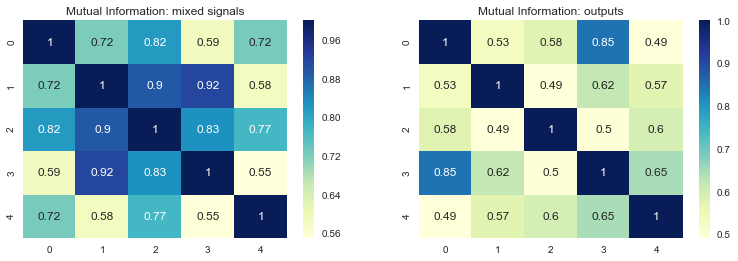

In [17]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)